In [34]:
using DataFrames
using Statistics
using Plots
using Polynomials
using CSV

In [35]:
#Source functions
function naive_multiplication(A, B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

function better_multiplication(A, B)
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(A,1)
    for k=1:size(B,2)
        for i=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end


#Comparing function returns proper DataFrame, 
#nm_julia - naive_multiplication, bm_julia - better mutiplication, bl_julia - blas multiplication

function test_multiplication_methods(init_value::Int64, step::Int64, iterations::Int64,trials::Int64)
    n = init_value
    result = DataFrame(methodID=[],matrix_size=[],elapsed_time=[],trial=[])
    
    for i = 1 : iterations 
        println("Matrix size: " , n);
        A = rand(n,n)
        B = rand(n,n)
        for j = 1 : trials
            println("    Naive " , j);
            time = @elapsed naive_multiplication(A,B)
            push!(result,["nai_jl",n,time,j])
            
            println("    Better " , j);
            time = @elapsed better_multiplication(A,B)
            push!(result,["bet_jl",n,time,j])
            
            println("    Blas " , j);
            time = @elapsed A * B;
            push!(result,["bla_jl",n,time,j])
        end
        
        n += step;
    end
    return result;
end

#Function compilation
Asmall = rand(2,2)
Bsmall = rand(2,2)
naive_multiplication(Asmall, Bsmall)
better_multiplication(Asmall, Bsmall)
Asmall * Bsmall
test_multiplication_methods(2, 1, 2, 12);

Matrix size: 2
    Naive 1
    Better 1
    Blas 1
    Naive 2
    Better 2
    Blas 2
    Naive 3
    Better 3
    Blas 3
    Naive 4
    Better 4
    Blas 4
    Naive 5
    Better 5
    Blas 5
    Naive 6
    Better 6
    Blas 6
    Naive 7
    Better 7
    Blas 7
    Naive 8
    Better 8
    Blas 8
    Naive 9
    Better 9
    Blas 9
    Naive 10
    Better 10
    Blas 10
    Naive 11
    Better 11
    Blas 11
    Naive 12
    Better 12
    Blas 12
Matrix size: 3
    Naive 1
    Better 1
    Blas 1
    Naive 2
    Better 2
    Blas 2
    Naive 3
    Better 3
    Blas 3
    Naive 4
    Better 4
    Blas 4
    Naive 5
    Better 5
    Blas 5
    Naive 6
    Better 6
    Blas 6
    Naive 7
    Better 7
    Blas 7
    Naive 8
    Better 8
    Blas 8
    Naive 9
    Better 9
    Blas 9
    Naive 10
    Better 10
    Blas 10
    Naive 11
    Better 11
    Blas 11
    Naive 12
    Better 12
    Blas 12


In [36]:
#Calculate for n in {100, 200, ..., 1100} with ten trials
df_data = test_multiplication_methods(100, 100, 11, 10)

Matrix size: 100
    Naive 1
    Better 1
    Blas 1
    Naive 2
    Better 2
    Blas 2
    Naive 3
    Better 3
    Blas 3
    Naive 4
    Better 4
    Blas 4
    Naive 5
    Better 5
    Blas 5
    Naive 6
    Better 6
    Blas 6
    Naive 7
    Better 7
    Blas 7
    Naive 8
    Better 8
    Blas 8
    Naive 9
    Better 9
    Blas 9
    Naive 10
    Better 10
    Blas 10
Matrix size: 200
    Naive 1
    Better 1
    Blas 1
    Naive 2
    Better 2
    Blas 2
    Naive 3
    Better 3
    Blas 3
    Naive 4
    Better 4
    Blas 4
    Naive 5
    Better 5
    Blas 5
    Naive 6
    Better 6
    Blas 6
    Naive 7
    Better 7
    Blas 7
    Naive 8
    Better 8
    Blas 8
    Naive 9
    Better 9
    Blas 9
    Naive 10
    Better 10
    Blas 10
Matrix size: 300
    Naive 1
    Better 1
    Blas 1
    Naive 2
    Better 2
    Blas 2
    Naive 3
    Better 3
    Blas 3
    Naive 4
    Better 4
    Blas 4
    Naive 5
    Better 5
    Blas 5
    Naive 6
    Better 6
    Blas 6
    Nai

,methodID,matrix_size,elapsed_time,trial
,Any,Any,Any,Any
1,nai_jl,100,0.00456165,1
2,bet_jl,100,0.00270636,1
3,bla_jl,100,0.000119341,1
4,nai_jl,100,0.00435874,2
5,bet_jl,100,0.00283715,2
6,bla_jl,100,7.6718e-5,2
7,nai_jl,100,0.00408651,3
8,bet_jl,100,0.00248739,3
9,bla_jl,100,6.4292e-5,3


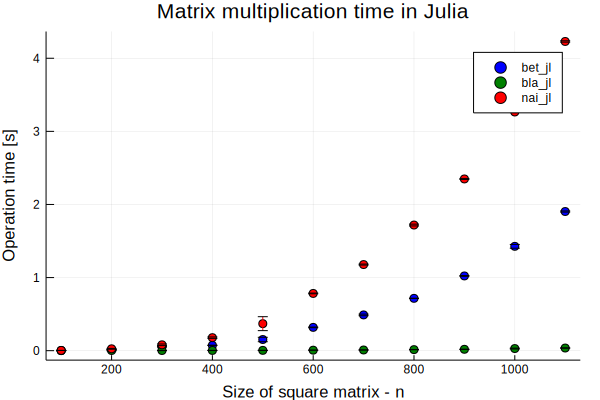

In [39]:
df_prog=by(df_data,
    [:methodID,:matrix_size],
    df->DataFrame(mean=mean(df[:elapsed_time]), stddev=std(df[:elapsed_time])))

scatter(df_prog[:matrix_size],
    xlabel="Size of square matrix - n",
    ylabel="Operation time [s]",
    df_prog[:mean],
    group=df_prog[:methodID], 
colour=[:blue :green :red],
    yerr=df_prog[:stddev],
    layout=1,
title="Matrix multiplication time in Julia")


In [66]:
df_data_O0=CSV.read("Matrix_multiplication_C_O0.csv")
df_data_O3=CSV.read("Matrix_multiplication_C_O3.csv")

df_prog_O0=by(df_data_O0,
    [:function_type,:matrix_size],
    df->DataFrame(mean=mean(df[:real_time]), stddev=std(df[:real_time])))

df_level_03=by(df_data_O3,
    [:function_type,:matrix_size],
    df->DataFrame(mean=mean(df[:real_time]), stddev=std(df[:real_time])))

sort(df_prog_O0, [:function_type,:matrix_size])

,function_type,matrix_size,mean,stddev
,String⍰,Int64⍰,Float64,Float64
1,bet_c,100,0.0036,0.000516398
2,bet_c,200,0.0271,0.000567646
3,bet_c,300,0.09,0.000471405
4,bet_c,400,0.211,2.92569e-17
5,bet_c,500,0.4771,0.0802018
6,bet_c,600,0.9832,0.0107992
7,bet_c,700,1.5581,0.0106192
8,bet_c,800,2.3309,0.0100604
9,bet_c,900,3.3325,0.0158272


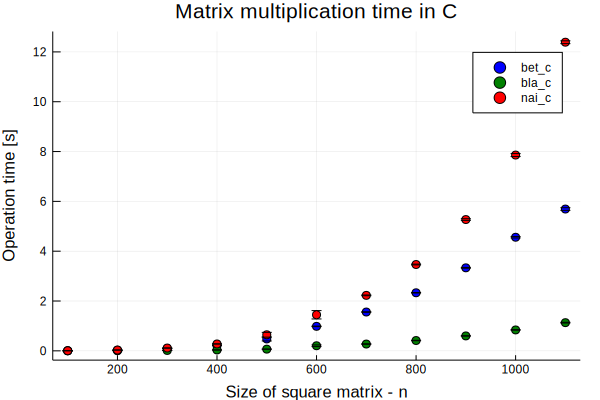

In [67]:
#Calculation with gcc with no optimization
scatter(df_prog_O0[:matrix_size],
    xlabel="Size of square matrix - n",
    ylabel="Operation time [s]",
    df_prog_O0[:mean], 
    group=df_prog_O0[:function_type], 
    colour=[:blue :green :red],
    yerr=df_prog_O0[:stddev],
    layout=1,
    title="Matrix multiplication time in C")

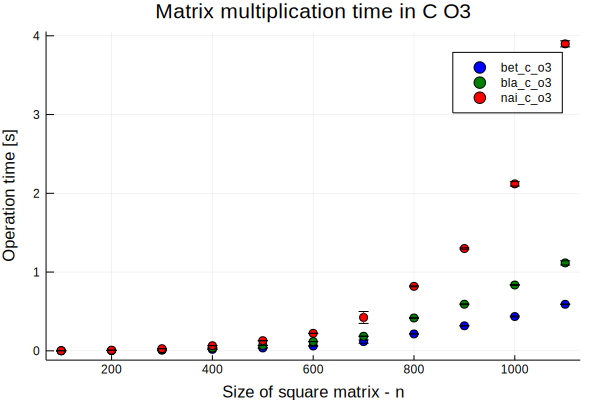

In [42]:
#Calculation with O3 gcc flag
df_level_03_f = df_level_03[(df_level_03[:stddev].< 1.0),:]
scatter(df_level_03_f[:matrix_size],
    xlabel="Size of square matrix - n",
    ylabel="Operation time [s]",
    df_level_03_f[:mean], 
    group=df_level_03_f[:function_type], 
    colour=[:blue :green :red],
    yerr=df_level_03_f[:stddev],
    layout=1,
    title="Matrix multiplication time in C O3")

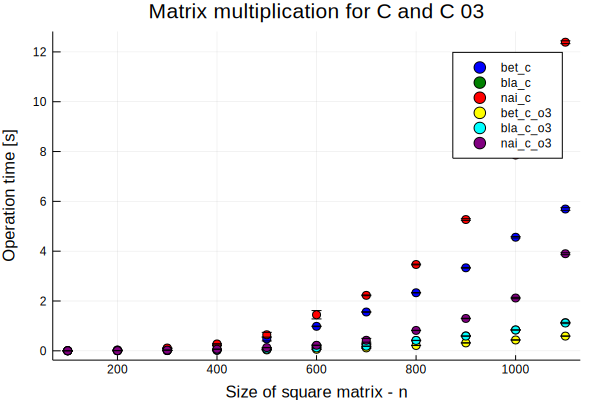

In [53]:
scatter(df_prog_O0[:matrix_size],
    xlabel="Size of square matrix - n",
    ylabel="Operation time [s]",
    df_prog_O0[:mean], 
    group=df_prog_O0[:function_type], 
    colour=[:blue :green :red],
    yerr=df_prog_O0[:stddev],
    layout=1,
    title="Matrix multiplication for C and C 03")

scatter!(df_level_03_f[:matrix_size],
    df_level_03_f[:mean], 
    group=df_level_03_f[:function_type], 
    colour=[:yellow :cyan :purple],
    yerr=df_level_03_f[:stddev],
    layout=1)

C naive Poly(-0.7476348484848373 + 0.007779256993006932*x - 2.1193927738927644e-5*x^2 + 2.2463811188811153e-8*x^3)
C better Poly(0.2196136363636387 - 0.0022046843434343592*x + 4.8284382284382595e-6*x^2 + 1.5997863247863068e-9*x^3)
C blas  Poly(0.005689393939394954 - 6.044735819736383e-5*x + 2.9265734265743653e-8*x^2 + 8.661810411810366e-10*x^3)


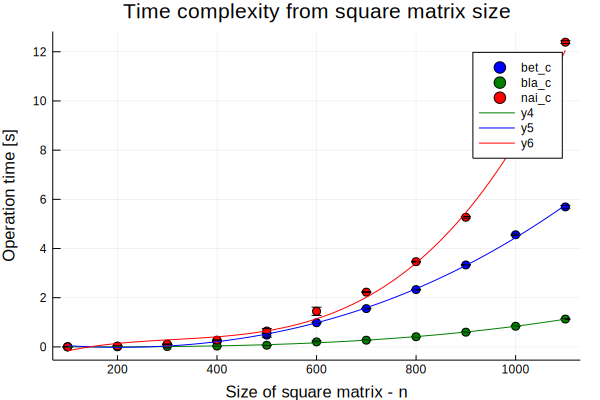

In [72]:
#Matrix multiplication complexity O(N^3) for naive and O(N^2,376) for Don Coppersmith and Shmuel Winograd method 
#Complexity is given for square matrices for C without optimization
xs_blas = df_prog_O0[(df_prog_O0[:function_type].== "bla_c"),:matrix_size];
ys_blas = df_prog_O0[(df_prog_O0[:function_type].== "bla_c"),:mean];
xs_naive = df_prog_O0[(df_prog_O0[:function_type].== "nai_c"),:matrix_size];
ys_naive = df_prog_O0[(df_prog_O0[:function_type].== "nai_c"),:mean];
xs_better = df_prog_O0[(df_prog_O0[:function_type].== "bet_c"),:matrix_size];
ys_better = df_prog_O0[(df_prog_O0[:function_type].== "bet_c"),:mean];

fit_blas=polyfit(xs_blas, ys_blas,3)
fit_naive=polyfit(xs_naive, ys_naive,3)
fit_better=polyfit(xs_better, ys_better,3)
println("C naive ", fit_naive)
println("C better ", fit_better)
println("C blas  ", fit_blas)

xd=100:0.1:1100
scatter(df_prog_O0[:matrix_size],
xlabel="Size of square matrix - n",
    ylabel="Operation time [s]",
    df_prog_O0[:mean], 
    group=df_prog_O0[:function_type], 
    colour=[:blue :green :red],
    yerr=df_prog_O0[:stddev],
    layout=1,
    title="Time complexity from square matrix size")

plot!(xd,polyval(fit_blas, xd), colour = [:green])
plot!(xd,polyval(fit_better, xd), colour = [:blue])
plot!(xd,polyval(fit_naive, xd), colour = [:red])

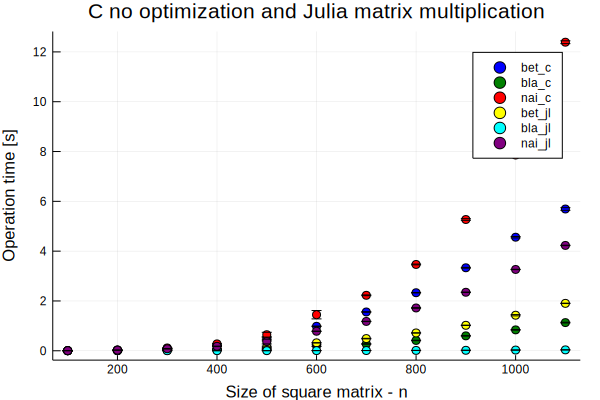

In [64]:
   
df_prog=by(df_data,
    [:methodID,:matrix_size],
    df->DataFrame(mean=mean(df[:elapsed_time]), stddev=std(df[:elapsed_time])))

scatter(df_prog_O0[:matrix_size],
xlabel="Size of square matrix - n",
    ylabel="Operation time [s]",
    df_prog_O0[:mean], 
    group=df_prog_O0[:function_type], 
    colour=[:blue :green :red],
    yerr=df_prog_O0[:stddev],
    layout=1,
    title="C no optimization and Julia matrix multiplication")

scatter!(df_prog[:matrix_size],
    df_prog[:mean], 
    group=df_prog[:methodID],  
    colour=[:yellow :cyan :purple],
    yerr=df_prog[:stddev],
    layout=1)



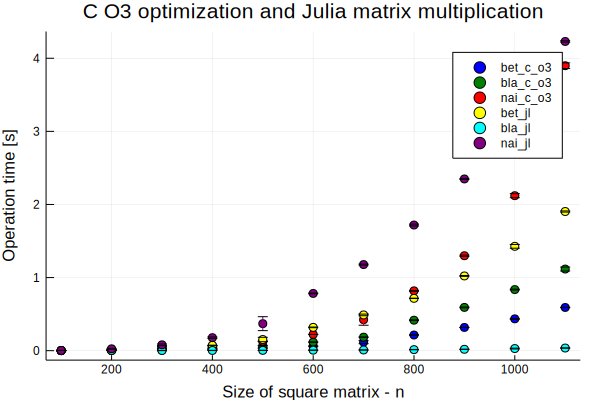

In [63]:
df_prog=by(df_data,
    [:methodID,:matrix_size],
    df->DataFrame(mean=mean(df[:elapsed_time]), stddev=std(df[:elapsed_time])))

scatter(df_level_03_f[:matrix_size],
xlabel="Size of square matrix - n",
    ylabel="Operation time [s]",
    df_level_03_f[:mean], 
    group=df_level_03_f[:function_type], 
    colour=[:blue :green :red],
    yerr=df_level_03_f[:stddev],
    layout=1,
    title="C O3 optimization and Julia matrix multiplication")

scatter!(df_prog[:matrix_size],
    df_prog[:mean], 
    group=df_prog[:methodID],  
    colour=[:yellow :cyan :purple],
    yerr=df_prog[:stddev],
    layout=1)